In [1]:
# NLP package used to aid in text manipulation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import dateutil.relativedelta
import eikon as ek
ek.set_app_key('XYZ')


In [11]:
now = datetime.now()
maxenddate = now - dateutil.relativedelta.relativedelta(years=10) #months,days
print(now, maxenddate)

2023-04-12 17:50:38.388840 2013-04-12 17:50:38.388840


In [12]:
newsdf = pd.DataFrame()
startdf=now
while startdf >= maxenddate:
    try:
        df1 = ek.get_news_headlines('BTC= AND Language:EN', date_to = startdf, count=100)
        startdf = df1['versionCreated'].min().replace(second=0,microsecond=0,tzinfo=None).strftime('%Y/%m/%d %H:%M')
        startdf = datetime.strptime(startdf,'%Y/%m/%d %H:%M')
        if len(newsdf):
            newsdf = pd.concat([newsdf, df1], axis=0)
        else:
            newsdf = df1
    except Exception:
        break

In [13]:
newsdf

,versionCreated,text,storyId,sourceCode
2023-04-12 15:28:28.901,2023-04-12 15:28:28.901000+00:00,First Mover Americas: Ether's Shanghai Rumble,urn:newsml:newswire.refinitiv.com:20230412:nCD...,NS:COIN
2023-04-12 15:28:28.884,2023-04-12 15:28:28.884000+00:00,Argentina’s National Securities Commission App...,urn:newsml:newswire.refinitiv.com:20230412:nCD...,NS:COIN
2023-04-12 15:08:01.000,2023-04-12 15:08:01+00:00,"LIVE MARKETS-Inflation follies: CPI cools, but...",urn:newsml:newswire.refinitiv.com:20230412:nL1...,NS:RTRS
2023-04-12 14:49:52.109,2023-04-12 14:55:27.509000+00:00,Refinitiv Newscasts - Bitcoin Remains Above $3...,urn:newsml:newswire.refinitiv.com:20230412:nRT...,NS:COIN
2023-04-12 14:55:15.585,2023-04-12 14:55:15.585000+00:00,Warren Buffett Calls Bitcoin a 'Gambling Token',urn:newsml:newswire.refinitiv.com:20230412:nCD...,NS:COIN
...,...,...,...,...
2022-01-12 18:52:47.000,2022-01-12 18:52:47+00:00,LIVE MARKETS-Don't move your eggs from the U.S...,urn:newsml:newswire.refinitiv.com:20220112:nL1...,NS:RTRS
2022-01-12 18:20:51.000,2022-01-12 18:20:51+00:00,LIVE MARKETS-How to play the Fed with sectors,urn:newsml:newswire.refinitiv.com:20220112:nL1...,NS:RTRS
2022-01-12 17:26:25.926,2022-01-12 17:26:25.926000+00:00,Does crypto allocation enhance your portfolio?,urn:newsml:newswire.refinitiv.com:20220112:nNR...,NS:MINTNE
2022-01-12 16:20:40.000,2022-01-12 16:20:40+00:00,LIVE MARKETS-Bond markets: doing one's homewor...,urn:newsml:newswire.refinitiv.com:20220112:nL1...,NS:RTRS


In [14]:
btc = ek.get_timeseries(['BTC='], start_date = '2013-03-12T09:00:00', end_date = '2023-03-06')
btc_news = ek.get_news_headlines('BTC=',count = 100)
btc_news = pd.DataFrame(btc_news['text'])

In [15]:
newsdf_t = newsdf['text']
newsdf_t = pd.DataFrame(newsdf_t)

In [16]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


sia = SentimentIntensityAnalyzer()

# we use the apply function to apply the polarity_scores function to each row of the 'text' column
newsdf['sentiment_scores'] = newsdf['text'].apply(sia.polarity_scores)

# Extract each sentiment score into separate columns
newsdf[['pos', 'neg', 'neu', 'compound']] = newsdf['sentiment_scores'].apply(pd.Series)




In [17]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


# Assuming your dataframe is named newsdf and the text column is 'text'
sia = SentimentIntensityAnalyzer()

# Use the apply function to apply the polarity_scores function to each row of the 'text' column
newsdf['sentiment_scores'] = newsdf['text'].apply(sia.polarity_scores)

# Extract each sentiment score into separate columns
newsdf[['pos', 'neg', 'neu', 'compound']] = newsdf['sentiment_scores'].apply(pd.Series)



# Resample the DataFrame and calculate the mean sentiment scores for each day
daily_sentiment = newsdf.resample('D')[['pos', 'neg', 'neu', 'compound']].mean()

# Reset the index to make the day a regular column
daily_sentiment.reset_index(inplace=True)
daily_sentiment = daily_sentiment.dropna()
# Now you have a new DataFrame with the average sentiment scores for each day
print(daily_sentiment)


         index       pos       neg       neu  compound
0   2022-01-12  0.025667  0.831000  0.143333  0.103867
1   2022-01-13  0.130500  0.822300  0.047200 -0.131450
2   2022-01-14  0.110400  0.775800  0.113800 -0.017550
3   2022-01-15  0.000000  1.000000  0.000000  0.000000
4   2022-01-16  0.000000  0.617000  0.383000  0.476700
..         ...       ...       ...       ...       ...
451 2023-04-08  0.068667  0.931333  0.000000 -0.127267
452 2023-04-09  0.000000  1.000000  0.000000  0.000000
453 2023-04-10  0.157667  0.800333  0.042000 -0.176617
454 2023-04-11  0.034258  0.891045  0.074697  0.063267
455 2023-04-12  0.049969  0.847375  0.102656  0.077934

[438 rows x 5 columns]


In [18]:
# Now you have the sentiment scores as columns in your DataFrame
newsdf['text']

2023-04-12 15:28:28.901        First Mover Americas: Ether's Shanghai Rumble
2023-04-12 15:28:28.884    Argentina’s National Securities Commission App...
2023-04-12 15:08:01.000    LIVE MARKETS-Inflation follies: CPI cools, but...
2023-04-12 14:49:52.109    Refinitiv Newscasts - Bitcoin Remains Above $3...
2023-04-12 14:55:15.585      Warren Buffett Calls Bitcoin a 'Gambling Token'
                                                 ...                        
2022-01-12 18:52:47.000    LIVE MARKETS-Don't move your eggs from the U.S...
2022-01-12 18:20:51.000        LIVE MARKETS-How to play the Fed with sectors
2022-01-12 17:26:25.926       Does crypto allocation enhance your portfolio?
2022-01-12 16:20:40.000    LIVE MARKETS-Bond markets: doing one's homewor...
2022-01-12 16:08:35.000    BUZZ-BTCS more than doubles since announcing b...
Name: text, Length: 6224, dtype: string

The compound score ranges from -1 to 1:

    A compound score close to -1 indicates a highly negative sentiment.
    A compound score close to 1 indicates a highly positive sentiment.
    A compound score close to 0 indicates a neutral or mixed sentiment.

Positive (pos): This score indicates the proportion of positive sentiment in the text. It ranges from 0 to 1, where higher values represent a higher proportion of positive sentiment. A text with a high positive score contains a significant number of positive words or phrases.

Negative (neg): This score indicates the proportion of negative sentiment in the text. It also ranges from 0 to 1, where higher values represent a higher proportion of negative sentiment. A text with a high negative score contains a significant number of negative words or phrases.

Neutral (neu): This score indicates the proportion of neutral sentiment in the text. It ranges from 0 to 1, where higher values represent a higher proportion of neutral sentiment. A text with a high neutral score contains a significant number of neutral words or phrases, or it may contain an even mix of positive and negative words, making the overall sentiment neutral.

In [19]:
# Access the sentiment scores
positive_scores = newsdf['pos']
negative_scores = newsdf['neg']
neutral_scores = newsdf['neu']
compound_scores = newsdf['compound']

# Calculate the average sentiment scores
avg_positive = positive_scores.mean()
avg_negative = negative_scores.mean()
avg_neutral = neutral_scores.mean()
avg_compound = compound_scores.mean()

print("Average Positive Sentiment Score:", avg_positive)
print("Average Negative Sentiment Score:", avg_negative)
print("Average Neutral Sentiment Score:", avg_neutral)
print("Average Compound Sentiment Score:", avg_compound)


Average Positive Sentiment Score: 0.08146850899742933
Average Negative Sentiment Score: 0.842228791773772
Average Neutral Sentiment Score: 0.07630077120822636
Average Compound Sentiment Score: -0.007010636246786622


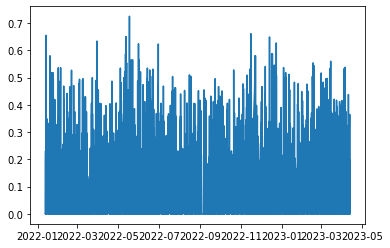

In [20]:
plt.plot(positive_scores)

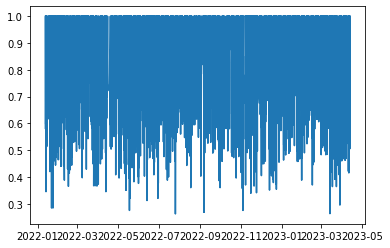

In [21]:
plt.plot(negative_scores)

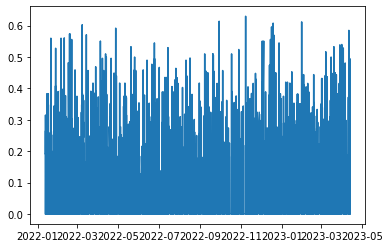

In [22]:
plt.plot(neutral_scores)

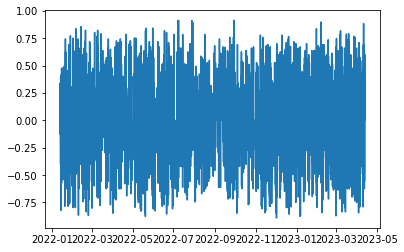

In [23]:
plt.plot(compound_scores)

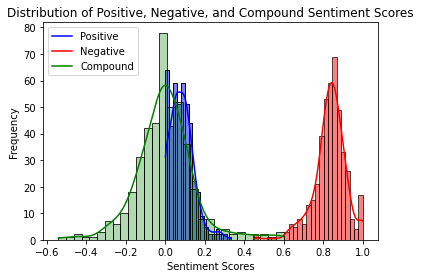

In [24]:
# Create the distribution plot for the positive sentiment scores
sns.histplot(data=daily_sentiment, x='pos', kde=True, color='blue', alpha=0.5)
sns.histplot(data=daily_sentiment, x='neg', kde=True, color='red', alpha=0.5)
sns.histplot(data=daily_sentiment, x='compound', kde=True, color='green', alpha=0.3)

# Set the labels and title
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Positive, Negative, and Compound Sentiment Scores')

# Add a legend
plt.legend(labels=['Positive', 'Negative', 'Compound'])

# Display the plot
plt.show()

In [25]:
btc = pd.read_csv('C:/DJ Cap/Data/btc_data.csv')

In [26]:
daily_sentiment

,index,pos,neg,neu,compound
0,2022-01-12,0.025667,0.831000,0.143333,0.103867
1,2022-01-13,0.130500,0.822300,0.047200,-0.131450
2,2022-01-14,0.110400,0.775800,0.113800,-0.017550
3,2022-01-15,0.000000,1.000000,0.000000,0.000000
4,2022-01-16,0.000000,0.617000,0.383000,0.476700
...,...,...,...,...,...
451,2023-04-08,0.068667,0.931333,0.000000,-0.127267
452,2023-04-09,0.000000,1.000000,0.000000,0.000000
453,2023-04-10,0.157667,0.800333,0.042000,-0.176617
454,2023-04-11,0.034258,0.891045,0.074697,0.063267


In [27]:
data = btc['o.c'][len(btc['o.c'])-len(daily_sentiment):]
index = data.index
daily_sentiment.index = index


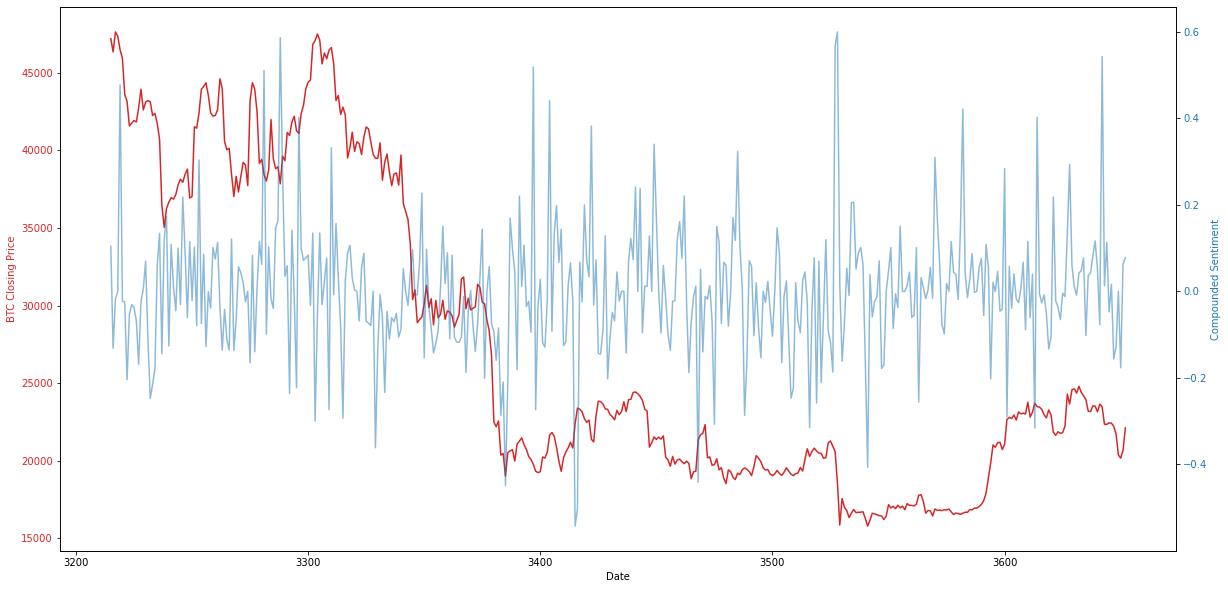

In [29]:
plt.rcParams['figure.figsize'] = (20, 10)
# Create the plot figure and axes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Closing Price', color=color)
ax1.plot(data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Compounded Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(daily_sentiment['compound'], color=color, alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

In [32]:
#Because the sentiment has a dilay, we take the diferemces to trade the dynamic of the sentiment scores.
test = daily_sentiment['compound'].diff().dropna()
test

3216   -0.235317
3217    0.113900
3218    0.017550
3219    0.476700
3220   -0.499457
          ...   
3648    0.028933
3649    0.127267
3650   -0.176617
3651    0.239883
3652    0.014668
Name: compound, Length: 437, dtype: float64

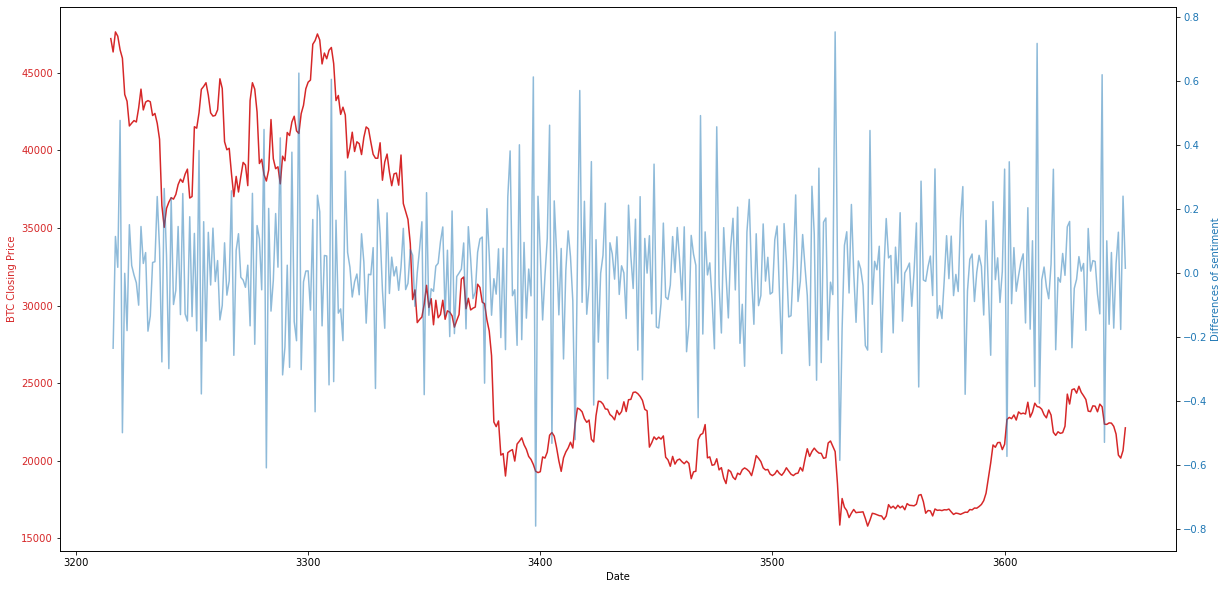

In [33]:
plt.rcParams['figure.figsize'] = (20, 10)
# Create the plot figure and axes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Closing Price', color=color)
ax1.plot(data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Differences of sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(test, color=color, alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

In [78]:
#Long short
#Transform Signal in a -1,1 Signal
import numpy as np
data = btc['o.c'][len(btc['o.c'])-len(daily_sentiment['compound']):]
index = data.index
daily_sentiment.index = index

trading_signal = np.array(daily_sentiment['compound'])
y2 = []
for i in range(0,len(daily_sentiment)):
    if trading_signal[i] > 0:
        y2.append(1)
    else:
        y2.append(-1)

In [79]:
#only short
trading_signal = np.array(daily_sentiment['compound'])
y1 = []
for i in range(0,len(daily_sentiment)):
    if trading_signal[i] > 0:
        y1.append(0)
    else:
        y1.append(-1)

In [80]:
#only long
trading_signal = np.array(daily_sentiment['compound'])
y0 = []
for i in range(0,len(daily_sentiment)):
    if trading_signal[i] > 0:
        y0.append(1)
    else:
        y0.append(0)

In [81]:
n = len(daily_sentiment['compound'])
X = btc['o.c'].pct_change().shift(-1) 
X = X[len(X)-n:]
len(X)

438

In [82]:
data = btc['o.c'][len(btc['o.c'])-len(test):]
index = data.index
test.index = index


In [83]:
# Mit differenzen
X1 = btc['o.c'].pct_change().shift(-1)
X1 = X1[len(X1)-len(test):] 



trading_signal = np.array(test)
y_diff_sig = []
for i in range(0,len(test)):
    if trading_signal[i] > 0:
        y_diff_sig.append(-1) #Switch in dierectaion because we took differences so if test > 0 -> short else long
    else:
        y_diff_sig.append(1)


#performance
perf_d_f = y_diff_sig * X1

perf_d_f = perf_d_f.dropna()

trading_days_Y = len(test) 

perf_sharpe = np.sqrt(trading_days_Y) * np.mean(perf_d_f) / (np.sqrt(np.var(perf_d_f)))

In [84]:
#long Sentiment
perf0 = y0 * X

perf0 = perf0.dropna()

trading_days_Y = 365 

perf_sharpe0 = np.sqrt(trading_days_Y) * np.mean(perf0) / (np.sqrt(np.var(perf0)))

In [85]:
#short Sentiment
perf1 = y1 * X

perf1 = perf1.dropna()

trading_days_Y = 365 

perf_sharpe1 = np.sqrt(trading_days_Y) * np.mean(perf1) / (np.sqrt(np.var(perf1)))

In [86]:
#long short Sentiment
perf2 = y2 * X

perf2 = perf2.dropna()

trading_days_Y = 365 

perf_sharpe2 = np.sqrt(trading_days_Y) * np.mean(perf2) / (np.sqrt(np.var(perf2)))

In [87]:
#buy and hold
perf3 = X
trading_days_Y = 365

perf_sharpe3 = np.sqrt(trading_days_Y) * np.mean(perf3) / (np.sqrt(np.var(perf3)))

In [88]:
# S = w1 * deltaS0 + w2 * S0 -> Grid search

Best combination:
 w1                                                              0.19
w2                                                              0.81
S                  [0.03942183333333334, -0.0848335, -0.010880999...
trading_signals    [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, ...
performance        3216    0.027876
3217    0.005787
3218    0.01...
sharpe_ratio                                                2.265938
Name: 19, dtype: object


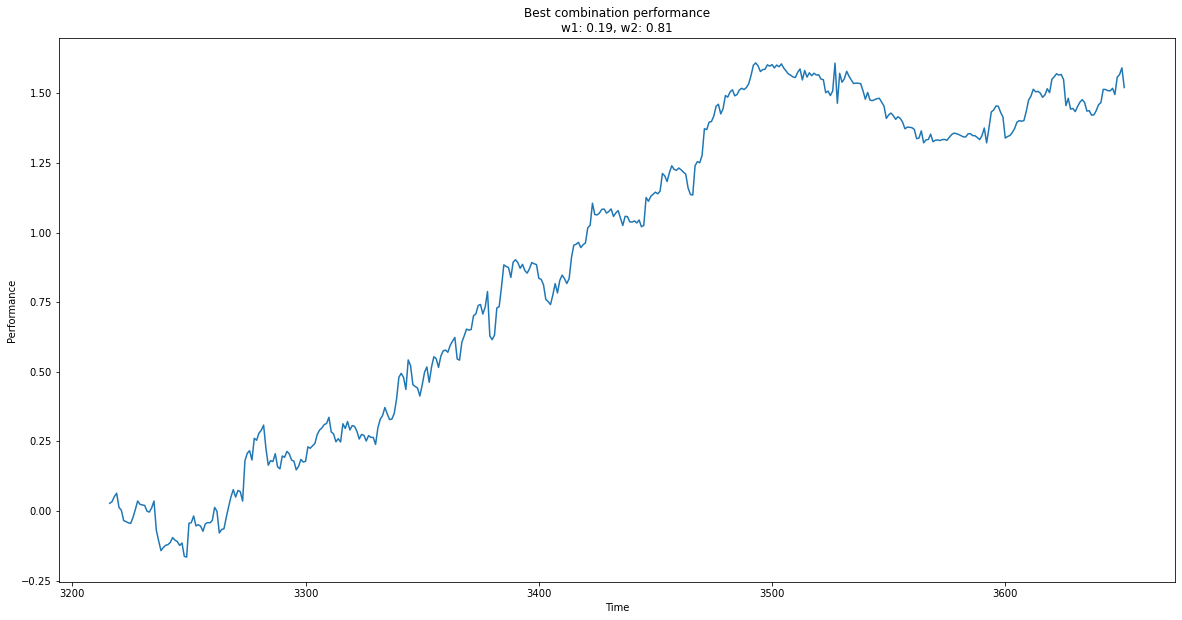

In [101]:

deltaS0 = test  #diff
S0 = daily_sentiment['compound']  #original

# Define the range and step size for w1 and w2
w1_range = np.arange(0, 1.1, 0.01)
w2_range = np.arange(0, 1.1, 0.01)

# Initialize a list to store the results
results = []

# Perform the grid search
for w1 in w1_range:
    for w2 in w2_range:
        # Ensure w1 + w2 = 1 to maintain a valid weight combination
        if w1 + w2 == 1:
            S = [w1 * dS0 + w2 * s for dS0, s in zip(deltaS0, S0)]
            results.append({'w1': w1, 'w2': w2, 'S': S})

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Generate the trading signals
signals = []

for index, row in df.iterrows():
    trading_signal = np.array(row['S'])
    y_diff_and_senti = []

    # Calculate the differences
    differences = np.diff(trading_signal)

    # Generate the trading signals
    for diff in differences:
        if diff > 0:
            y_diff_and_senti.append(-1)
        else:
            y_diff_and_senti.append(1)
    
    signals.append(y_diff_and_senti)

# Add the trading signals to the DataFrame
df['trading_signals'] = signals

X1 = btc['o.c'].pct_change().shift(-1)
X1 = X1[len(X1)-len(test):] 
X1 = X1.dropna()


# Calculate the performance
performances = []

for index, row in df.iterrows():
    perf_new = np.array(row['trading_signals']) * X1
    perf_new = perf_new[~np.isnan(perf_new)]  # Remove NaN values
    performances.append(perf_new)

df['performance'] = performances

# Calculate the Sharpe Ratio
trading_days_Y = len(deltaS0)
sharpe_ratios = []

for perf_new in df['performance']:
    sharpe_ratio = np.sqrt(trading_days_Y) * np.mean(perf_new) / np.sqrt(np.var(perf_new))
    #sp_ann = sharpe_ratio * np.sqrt(365) #annualized (is this correct?)
    sharpe_ratios.append(sharpe_ratio)

df['sharpe_ratio'] = sharpe_ratios

# Find the best combination based on the Sharpe Ratio
best_combination = df.loc[df['sharpe_ratio'].idxmax()]

# Print the best combination
print("Best combination:\n", best_combination)

# Plot the best combination's performance
plt.plot(best_combination['performance'].cumsum())
plt.title(f"Best combination performance\nw1: {best_combination['w1']}, w2: {best_combination['w2']}")
plt.xlabel("Time")
plt.ylabel("Performance")
plt.show()


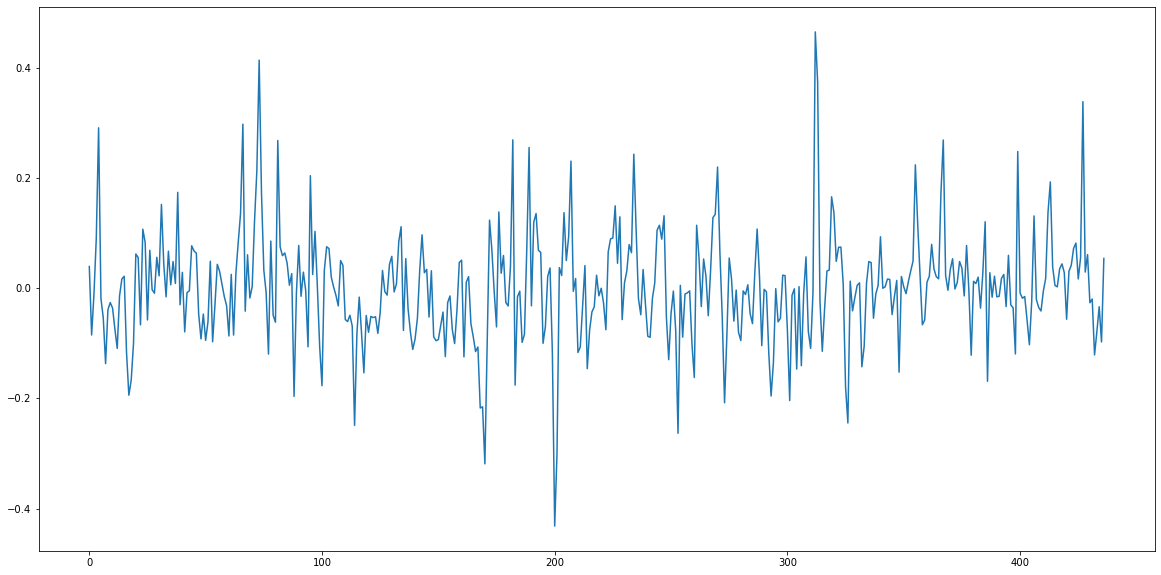

In [100]:
#Sentiment score
plt.plot(best_combination['S'])

In [90]:
#Combination between the diff and Sentiment score based on best sharpe ratio
X2 = btc['o.c'].pct_change().shift(-1)
X2 = X2[len(X2)-len(test):] 
X2 = X2.dropna()
y_4 = best_combination['trading_signals']
perf4 = y_4 * X2

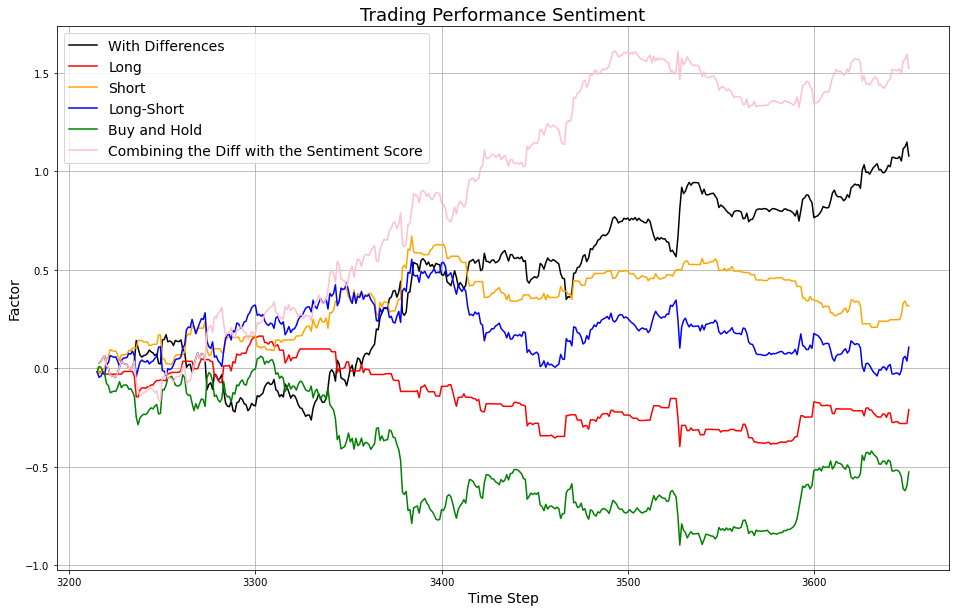

In [91]:
plt.figure(figsize=(16,10))
plt.title('Trading Performance Sentiment', fontsize = 18)
plt.ylabel('Factor', fontsize = 14)
plt.xlabel('Time Step', fontsize = 14)
plt.grid(True)
plt.plot(perf_d_f.cumsum() , label='With Differences', color = 'black')
plt.plot(perf0.cumsum() , label='Long', color = 'red')
plt.plot(perf1.cumsum() , label='Short', color = 'orange')
plt.plot(perf2.cumsum() , label='Long-Short', color = 'blue')
plt.plot(perf3.cumsum() , label='Buy and Hold', color = 'green')
plt.plot(perf4.cumsum() , label='Combining the Diff with the Sentiment Score', color = 'pink')
plt.legend(loc='best', fontsize = 14)